# Numerical Analysis 101: Interpolation

[Numerical Analysis](https://en.wikipedia.org/wiki/Numerical_analysis) is an enormous field that encompasses a vast array of topics.

## Choosing Interpolation Points

While all of this looks promising so far, polynomial interpolation has a very fatal flaw: the "goodness" of the fitted function depends **very** heavily on the number and distribution of interpolation points, or *nodes*. This is called the [*Runge Phenomena*](https://en.wikipedia.org/wiki/Runge%27s_phenomenon), and can be seen pretty easily with an example. Runge's classic example $$ f(x) = \frac{1}{1 + 25x^2}$$ is useful in that it is a smooth "nice" looking function. Let's plot it and see what we're dealing with.

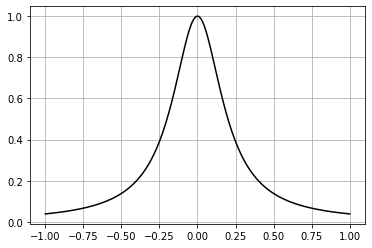

In [2]:
from matplotlib import pyplot as plt
import numpy as np


def runge_function(x: np.ndarray) -> np.ndarray:
    """The Runge """
    return 1 / (1 + 25 * x * x)

x = np.linspace(-1, 1, 200)

fig, ax = plt.subplots()
ax.grid()
ax.plot(x, runge_function(x), 'k')

Fitting a polynomial to this thing can't be too hard, right? Well, let's try. The first thing we need to do is select a set of points to interpolate over. The most obvious choice is to just uniformly sample the curve. That is, pick $n$ evenly spaced points in the interval we're interested in (for simplicity, $-1$ to $1$).That's certainly easy to do, let's see what we get.

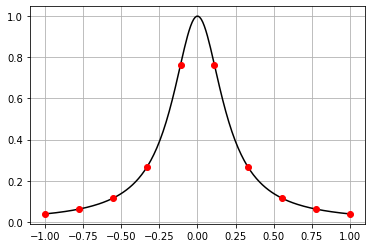

In [3]:
n = 10
samples = np.linspace(-1, 1, n)
fig, ax = plt.subplots()
ax.grid()
ax.plot(x, runge_function(x), 'k')
ax.plot(samples, runge_function(samples), 'or')

That certainly looks reasonable, but what happens if we use [SciPy's](https://www.scipy.org/) built-in polynomial interpolation function `barycentric_interpolate`?

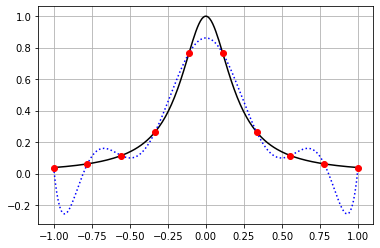

In [4]:
from scipy.interpolate import barycentric_interpolate

n = 10
samples = np.linspace(-1, 1, n)
interpolated = barycentric_interpolate(samples, runge_function(samples), x)

fig, ax = plt.subplots()
ax.grid()
ax.plot(x, runge_function(x), 'k')
ax.plot(x, interpolated, ':b')
ax.plot(samples, runge_function(samples), 'or')

That's not great... The worst part is, if we increase the number of nodes. Below we can see that the accuracy of our fit *decreases* as the number of nodes *increases*
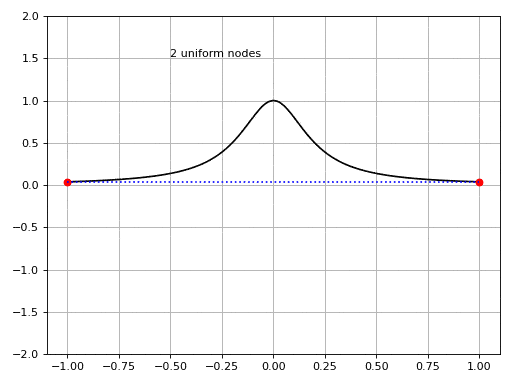 

Using Chebyshev nodes greatly improves the fit and ensures that the interpolation converges to the base function as we add more points.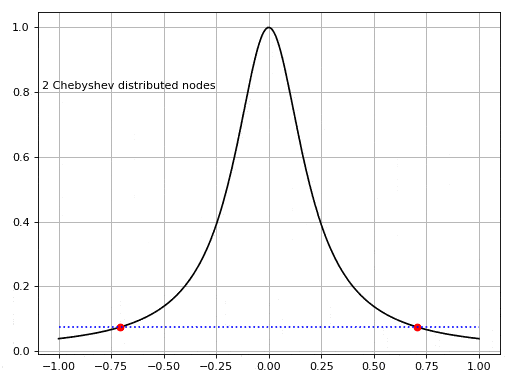

Of course, we could use a different tool altogether for the job and not have to worry about node placement. Spline interpolation serves as a very powerful method and is the most widely used in research and industry. The primary reasons being that spline interpolation is immune to the Runge Phenomena, so any distribution of points can be used, and there are several methods for generating splines algorithmically. Finally, for $n$ nodes (optimally distributed or otherwise) a spline interpolation tends to give a better fit compared to a single polynomial. This can be seen below with the SciPy `splrep` and `splev` functions (they stand for "spline representation" and "spline evaluation", respectively). This snippet shows us that the actual function is fit extremely well by a spline over just 15 points.

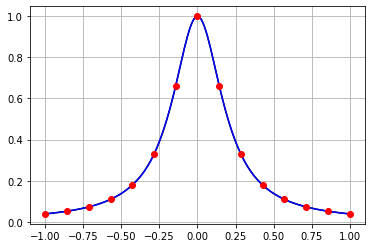

In [13]:
from scipy.interpolate import splrep, splev

n = 15
samples = np.linspace(-1, 1, n)
spline_function = splrep(samples, runge_function(samples))

fig, ax = plt.subplots()
ax.grid()
ax.plot(x, runge_function(x), 'k')
ax.plot(x, splev(x, spline_function), 'b')
ax.plot(samples, runge_function(samples), 'or')

The next notebook in this series will 